# Salmon classification with the bivariate Gaussian

In this assigment, you will predict if a fish is an 'Alaskan' salmon or a 'Canadian' salmon.

The algorithm you will use a generative algorithm.  Where you model each class as a **bivariate Gaussian**.

## Step 0. Import statements

The Python programming language, as most programming languages, is augmented by **modules**.  These modules contain functions and classes for specialized tasks needed in machine learning.

Below, we will `import` three modules:
* **pandas**
* **numpy**
* **matplotlib.pyplot**

Note that we imported these modules using **aliases**

In [9]:
# Standard libraries
%matplotlib inline
import pandas as pd
import numpy as np # for better array operations
import matplotlib.pyplot as plt # plotting utilities

# Module computing the Gaussian density
from scipy.stats import norm, multivariate_normal


## Step 1. Data preparation: loading, understanding and cleaning the dataset

### Importing the dataset
Make sure the file `Salmon_dataset.csv` is in the same directory as this notebook.

The dataset contains 100  examples, each example has 3 features (*gender, Freshwater, marine*) and a label (*Alaskan, Canadian*).

# New Section

In [10]:
# Loading the data set using Panda's in a dataframe

df = pd.read_csv('/content/Salmon_Dataset.csv', delimiter=',')

#Lets check that everything worked before continuing on
df.head()

,Gender,Freshwater,Marine,Origin
0,2,108,368,Alaskan
1,1,131,355,Alaskan
2,1,105,469,Alaskan
3,2,86,506,Alaskan
4,1,99,402,Alaskan


### Data preprocesssing
We will change the labels 'Alaskan' and 'Canadian' to $0$ and $1$ respectively.  In our code it is easier to work with numerical values instead of strings.

Often we will do more dataprepocessing, such as looking for missing values and scaling the data though that is NOT required for this assignment yet.

In [11]:
# It is easier to work with the data if the labels are integers
# Changing the 'Origin' column values, map 'Alaskan':0 and 'Canadian':1
df['Origin']=df.Origin.map({'Alaskan':0, 'Canadian':1})

#Lets check that everything worked before continuing on
df.head()

,Gender,Freshwater,Marine,Origin
0,2,108,368,0
1,1,131,355,0
2,1,105,469,0
3,2,86,506,0
4,1,99,402,0


In [12]:
# We will store the dataframe as a Numpy array
data = df.to_numpy()

# Split the examples into a training set (trainx, trainy) and test set (testx, testy)

########## Splitting the Dataset ##########
n =  data.shape[0] # the number of rows
train_n = int(.9*n) # this test set is a bit small to really evaluate our hypothesis - what could we do to get a better estimate and still keep most of the data to estimate our parameters?
np.random.seed(0) # Our code randomly chooses which examples will be the training data, but for grading purposes we want the random numbers used to seperate the data are the same for everyone
perm = np.random.permutation(n)
trainx = data[perm[0:train_n],1:3] #selecting the two of the features `Freshwater' and 'Marine'
trainy = data[perm[0:train_n],3]
testx = data[perm[train_n:n], 1:3] # We won't look at the testx data until it is time to evauate our hypothesis.  This numpy array contains the set of test data for the assignment
testy = data[perm[train_n:n],3]

##########


### Plotting the dataset
Visualization can be helpful when exploring and getting to know a dataset.

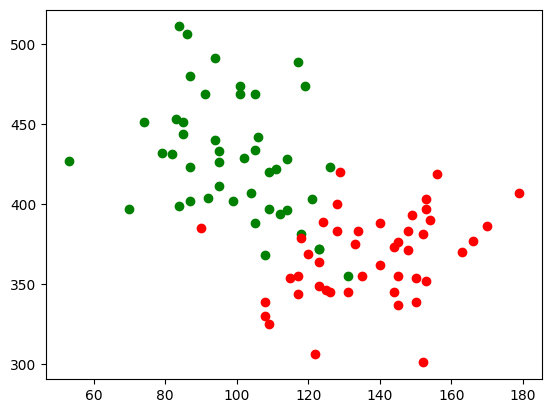

In [13]:
# plotting the Alaskan salmon as a green dot
plt.plot(trainx[trainy==0,0], trainx[trainy==0,1], marker='o', ls='None', c='g')
# plotting the Canadian salmon as a red dot
plt.plot(trainx[trainy==1,0], trainx[trainy==1,1], marker='o', ls='None', c='r')

## Step 2. Model training: implementing Gaussian Discriminant Analysis




###  Sufficient statistics

Just as if we were doing these calculations by hand, we break the process down into managable pieces.  Use the formulas we discussed in the lecture notes.

Our first helper function will find the mean and covariance of the Gaussian for a set of examples

In [14]:
# Input: a design matrix
# Output: a numpy array containing the means for each feature, and a 2-dimensional numpy array containng the covariance matrix sigma
import numpy as np
def fit_gaussian(df):
    mu = np.mean(df, axis=0)
    sigma = np.cov(df, rowvar=False,bias=True)
    return mu, sigma

# Fit model
mu_0, sigma_0 = fit_gaussian(trainx[trainy==0,:])
mu_1, sigma_1 = fit_gaussian(trainx[trainy==1,:])





Before moving on, test your code to make sure it works correctly.  




### Write the rest of your code here

In [15]:
# Make predictions on test set
y_pred = []
for i in range(len(testx)):
    p_0 = multivariate_normal.pdf(testx[i], mean=mu_0, cov=sigma_0)
    p_1 = multivariate_normal.pdf(testx[i], mean=mu_1, cov=sigma_1)

    if p_0 > p_1:
        y_pred.append(0)
    else:
        y_pred.append(1)
    print(p_0,p_1)
# Evaluate accuracy
acc = np.mean(y_pred == testy)
print("Test Accuracy:", acc)

6.056081767723309e-06 0.00013560491177504118
0.00010008182971705409 2.520672940055091e-10
0.00013582923822056655 4.347989156775914e-10
4.74685959094122e-07 0.00012273777493262167
0.0002134008036955958 3.9023799000848715e-06
1.3323460833390476e-05 0.000199323343178144
1.165674769967004e-05 5.899742814700495e-06
7.294267017631332e-08 3.728724341750128e-06
9.160495821438258e-05 3.9184914489216076e-11
5.823151826282238e-05 1.8761898616250863e-07
Test Accuracy: 0.9


In [17]:
with open('output.txt', 'w') as f:

    f.write('Estimated mu_0: ' + str(mu_0) + '\n')
    f.write('Estimated sigma_0: ' + str(sigma_0) + '\n')
    f.write('Estimated mu_1: ' + str(mu_1) + '\n')
    f.write('Estimated sigma_1: ' + str(sigma_1) + '\n')

    f.write('Predictions: ' + str(y_pred) + '\n')